# СБОРНЫЙ ПРОЕКТ ПО АНАЛИЗУ ДАННЫХ О ПРОДАЖАХ ИГР ИНТЕРНЕТ-МАГАЗИНА "СТРИМЧИК"

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные, доступные для анализа, составлены до 2016 года (могут быть неполными). Цель работы заключается в прогнозировании результатов на 2017 год.


План работы состоит из следующих пунктов:
- загрузка данных и изучение общей информации о них
- предобработка данных, где выявляются и устраняются явные и неявные дубликаты, пропуски, изменяются типы данных и подготавливаются к дальнейшему анализу
- проведение исследовательского анализа данных, в котором стоит выяснить и визуализировать: сколько игр выпускалось в разные годы; как менялись продажи по платформам; какой актуальный период у данных; какие платформы лидируют по продажам за выбранный период; как влияют на продажи внутри популярных платформ отзывы пользователей и критиков и каково общее распределение игр по жанрам
- составление общего портрета пользователя каждого региона, в котором определим топ-5 популярных платформ и жанров для жителей каждого региона, а также выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе
- проверка гипотез: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные
- общие выводы по проекту

### Загрузка данных и изучение общей информации

In [1]:
#импортировала необходимые для дальнейшей работы библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#выгрузила данные
try:
    df = pd.read_csv('C:/Users/Любовь/Downloads/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

df.head() #вывела первые строки датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info() #вывела общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**: в результате изучения общей информации видим, что в датафрейме всего 11 столбцов и 16715 строк. Во многих столбцах присутствуют пропуски, названия прописаны не в одном стиле, имеются ошибки в определении типа данных. Это все предстоит исправить на следующем этапе - в предобработке данных.

### Предобработка данных

In [4]:
df.columns = df.columns.str.lower() #привела все названия столбцов к нижнему регистру

In [5]:
df.duplicated().sum() #проверила на наличие дубликатов

0

In [6]:
df.loc[df.duplicated(subset=['name', 'platform', 'year_of_release'])].sort_values(by='name') #нашла неявные дубликаты по ключевым столбцам

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN


In [7]:
df.drop([14244, 16230], inplace=True) #удалила неявные дубликаты и обновила индексы

In [9]:
df.isna().sum() #вывела количество пропусков в стобцах

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [10]:
df.dropna(subset=['name', 'genre'], inplace=True) #удалила пропущенные значения, т.к. их мало

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') #перевела строковые значения в числа, ошибки изменила на NaN
df['user_score'] = df['user_score'].astype(float) #изменила тип данных

In [12]:
df['year_of_release'] = df['year_of_release'].astype('Int64') #изменила тип данных

In [13]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] #добавила столбец с суммарными продажами
df.head() #вывела первые строки обновленного датафрейма на экран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
df['rating'] = df['rating'].fillna('RP') #заменила пропуски в рейтинги на категорию ожидания проверки

In [16]:
df = df.replace({'rating':{'K-A':'E'}}) #объединила категории в одну по смыслу
df.drop(df.index[(df['rating'] == 'EC') & (df['rating'] == 'AO')], inplace=True) #удалила малочисленные категории

In [17]:
df.info() #вывела общую информацию

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
 11  sum_sales        16712 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 2.2+ MB


In [18]:
# check
df['rating'].value_counts()

RP      6767
E       3992
T       2961
M       1563
E10+    1420
EC         8
AO         1
Name: rating, dtype: int64

**Вывод:** на этапе предобработки данные были проверены на наличие дубликатов и пропусков. Явные дубликаты не были обнаружены, а неявные по ключевым столбцам были удалены. В стобцах с названием игры и жанром 1 пропуск - менять их на выдуманные названия нецелесообразно, поэтому просто удаляю эти данные в связи с их минимальным количесвтом. В столбце с годом выпуска 269 пропусков - медианное и среднее значения для них, на мой взгляд, также неуместны, поэтому я оставляю пропуски. В столбце с оценкой критиков больше половины пропущнных значений - я не трогала их, так как изменения могут сильно исказить картину, в реальной жизни лучше обговорить этот момент с заказчиком. Такая же ситуация и с данными оценок пользователей. А вот в рейтинге игры я посчитала уместным изменить пропуски на категорию "ожидает оценки", чтобы эти данные участвовали в дальнейшем анализе, а несколько подозрительно малочисленных категорий удалила из датафрейма. В столбце с оценкой пользователей также встречается значение 'tbd'(To Be Determined), что, по сути, и есть NaN. Поэтому я привела значения этого столбца к числовому типу, заменяя все всплывающие ошибки на NaN, а тип данных изменила на нецелочисленный.

### Исследовательский анализ

#### Посмотрим, сколько игр выпускалось в разные годы

In [19]:
df['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

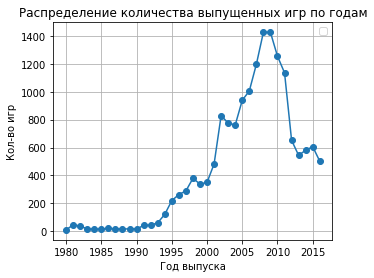

In [20]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(style='o-', figsize=(5,4), grid=True)
plt.title('Распределение количества выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во игр')
plt.legend('');

**Вывод:** на мой взгляд, рассматривать данные за все периоды нет необходимости, а для наглядности удобнее построить график. Из него видно, что наибольшее количество выпущенных игр пришлось на период с 2005 по 2011 годы. 

#### Посмотрим, как менялись продажи по платформам

In [24]:
sale = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
top_10 = sale.reset_index().iloc[:10]
top = top_10['platform'].unique() #создала список лучших платформ
top_10

,platform,sum_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.64
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


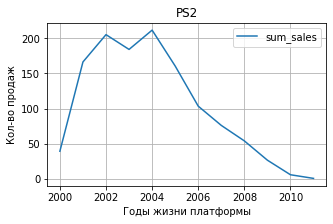

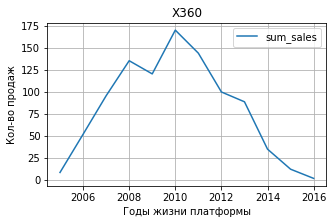

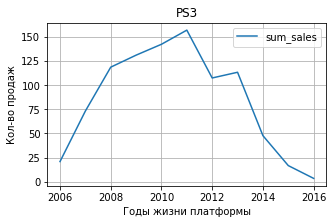

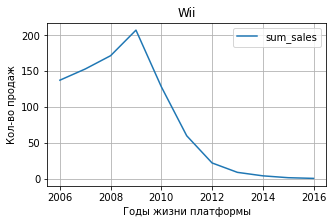

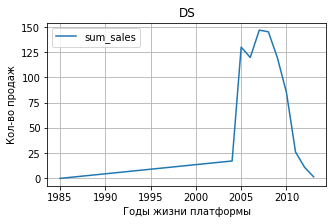

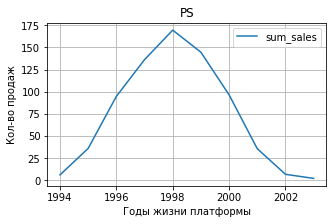

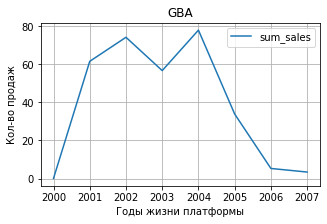

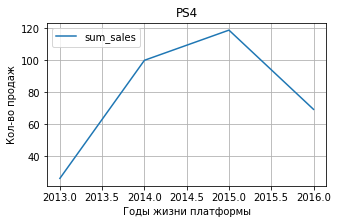

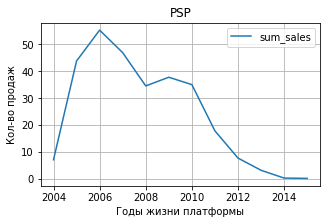

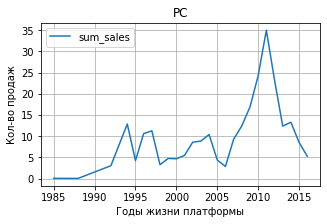

In [25]:
for platform in top:
    (
        df[df['platform'] == platform]
        .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
        .plot(style='-', figsize=(5,3), grid=True)
    )
    plt.title(platform)
    plt.xlabel('Годы жизни платформы')
    plt.ylabel('Кол-во продаж');

In [26]:
df[df['platform'] == 'DS'].sort_values(by='year_of_release').head() #вывела данные о платформе

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.0,NaN,NaN,RP,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.0,NaN,NaN,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.0,NaN,NaN,RP,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.0,NaN,NaN,RP,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.0,NaN,NaN,RP,0.19


In [27]:
df.loc[df['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2010

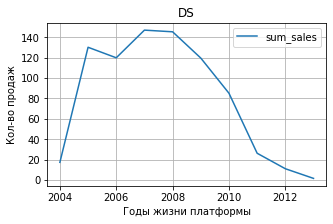

In [28]:
(
    df[df['platform'] == 'DS']
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
    .plot(style='-', figsize=(5,3), grid=True)
)
plt.title('DS')
plt.xlabel('Годы жизни платформы')
plt.ylabel('Кол-во продаж');

**Вывод:** построив графики распределения продаж по годам для наиболее прибыльных платформ можно заметить, что примерный "срок службы" платформы - около 10 лет. Также в графике платформы DS была аномалия в виде 1985 года (когда сама платформа существует с 2004), я изучила данные по ней и исправила дату релиза игры с 1985 на 2010, убрав тем самым аномалию. 

Актуальным периодом я считаю данные с 2014 года включительно, так как индустрия игр быстро развивается, смысла брать данные за больший период нет.

#### Посмотрим, какие платформы лидируют по продажам за актуальный период

In [29]:
actual_period = df.query('year_of_release > 2013') #определила актуальный период и выделила его в отдельную переменную
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


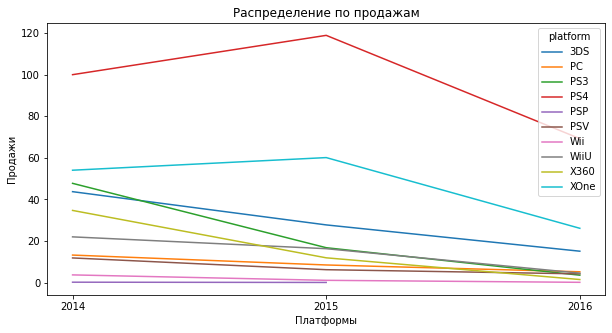

In [30]:
actual_period.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(style='-', figsize=(10,5))
plt.title('Распределение по продажам')    
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.xticks([2014, 2015, 2016]);

**Вывод**: по графику можно сделать вывод, что на 2016 год потенциальной является платформа PS4, вышедшая относительно недавно и еще не потерявшая популярность. Также стоит присмотреться к платформе XOne, набирающую неплохую популярность. Платформа 3DS начала терять популярность, однако, судя по данным, еще несколько лет она продержится на рынке с неплохими продажами. Так как данные за 2016 год неполные, не стоит делать вывод о падении платформ в этот период. Платформа PC хоть и не сильно приносит доход, зато стабильно и на протяжении долгого времени. PS3 и X360 только недавно стали терять популярность, но на 2016 год уже изжили себя, в то время как остальные платформы давно "угасли". 

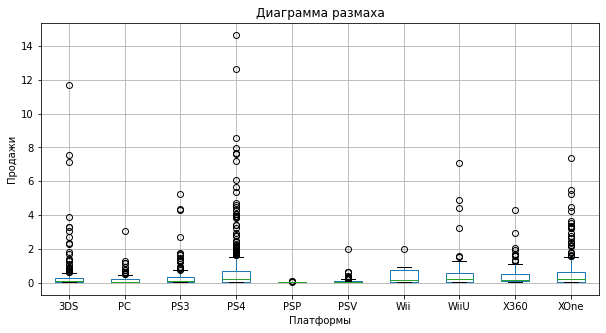

In [31]:
actual_period.pivot_table(index='name', columns='platform', values='sum_sales', aggfunc='sum').boxplot(figsize=(10,5))
plt.title('Диаграмма размаха')
plt.xlabel('Платформы')
plt.ylabel('Продажи');

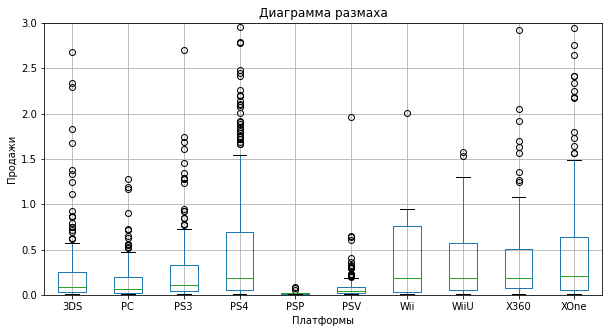

In [32]:
actual_period.pivot_table(index='name', columns='platform', values='sum_sales', aggfunc='sum').boxplot(figsize=(10,5))
plt.title('Диаграмма размаха')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.ylim(0,3);

**Вывод:** лидерами по продажам за все время являются PS3, X360, PS4, 3DS. Из графика и диаграммы размаха можно сделать вывод, что на 2016 год перспективные платформы: PS4, XOne, PC и 3DS.

#### Посмотрим, как влияют на продажи внутри популярных платформ отзывы пользователей и критиков

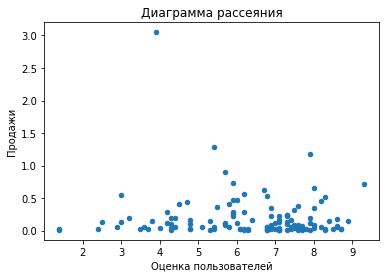

In [33]:
actual_period.query('platform == "PC"').plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи');

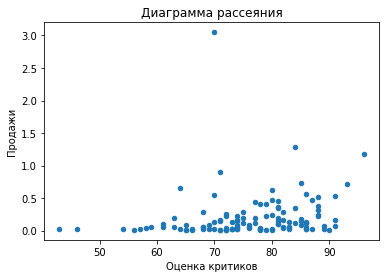

In [34]:
actual_period.query('platform == "PC"').plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи');

In [35]:
actual_period.query('platform == "PC"')[['user_score','critic_score', 'sum_sales']].corr().round(2)

,user_score,critic_score,sum_sales
user_score,1.00,0.47,-0.07
critic_score,0.47,1.00,0.17
sum_sales,-0.07,0.17,1.00


**Вывод:** для построения данных я выбрала наиболее стабильную платформу - PC. Из диаграммы рассеяния и таблицы можно скзатать, что игроки не сильно доверяют ни оценкам критиков, ни пользователей. Ведь даже при высоком рейтинге игры часто имеют невысокие продажи (и наоборот). Чтобы удостовериться в результатах, повторю те же действия с наиболее перспективной(PS4) и с наиболее прибыльной(X360) платформами.

In [36]:
actual_period.query('platform == "PS4"')[['user_score','critic_score', 'sum_sales']].corr().round(2)

,user_score,critic_score,sum_sales
user_score,1.00,0.55,-0.04
critic_score,0.55,1.00,0.40
sum_sales,-0.04,0.40,1.00


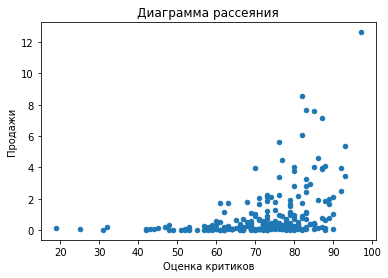

In [37]:
actual_period.query('platform == "PS4"').plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи');

In [38]:
actual_period.query('platform == "X360"')[['user_score','critic_score', 'sum_sales']].corr().round(2)

,user_score,critic_score,sum_sales
user_score,1.00,0.63,-0.14
critic_score,0.63,1.00,0.53
sum_sales,-0.14,0.53,1.00


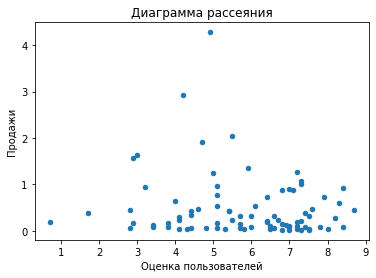

In [39]:
actual_period.query('platform == "X360"').plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи');

**Вывод:** в целом, выводы из предыдущего пункта подтвердились и на данных исследованиях. Коэффициент корреляции и диаграммы рассеяния показали, что продажи не особо зависят от оценок критиков и пользователей.

#### Посмотрим на общее распределение игр по жанрам

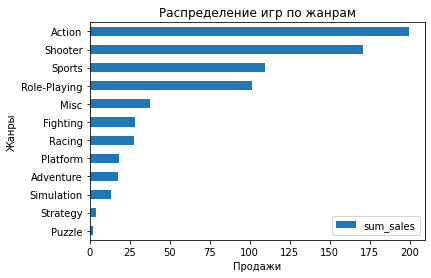

In [40]:
actual_period.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales').plot(kind='barh')
plt.title('Распределение игр по жанрам')
plt.xlabel('Продажи')
plt.ylabel('Жанры');

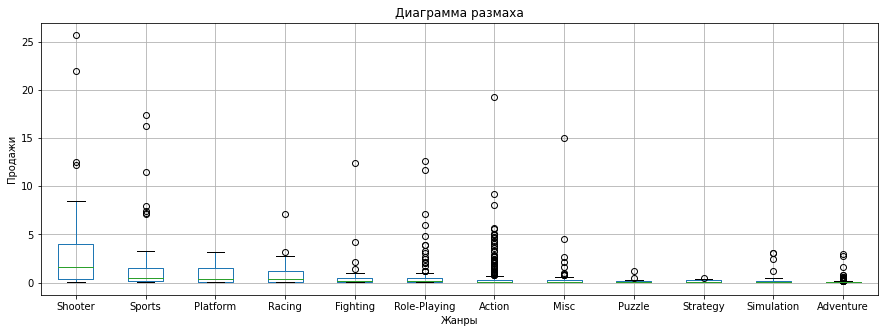

In [41]:
actual = actual_period.pivot_table(index='name', columns='genre', values='sum_sales', aggfunc='sum')
meds = actual.median().sort_values(ascending=False)
actual = actual[meds.index].boxplot(figsize=(15,5))
plt.title('Диаграмма размаха')
plt.xlabel('Жанры')
plt.ylabel('Продажи');

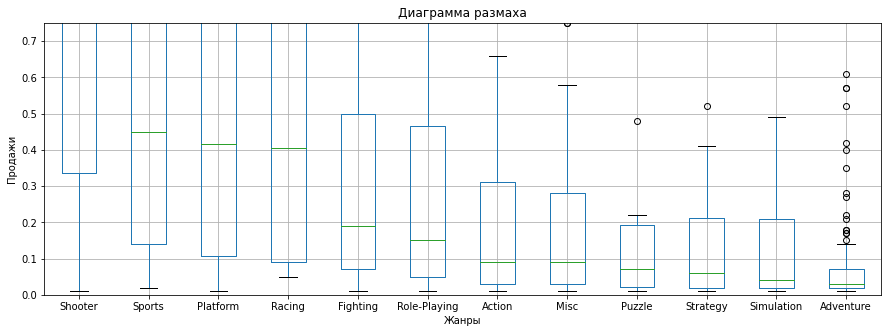

In [42]:
actual = actual_period.pivot_table(index='name', columns='genre', values='sum_sales', aggfunc='sum')
meds = actual.median().sort_values(ascending=False)
actual = actual[meds.index].boxplot(figsize=(15,5))
plt.title('Диаграмма размаха')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.ylim(0,0.75);

**Вывод:** в столбчатой диаграмме четко отслеживается лидер - жанр action. Для более углубленного анализа построила диаграммы размаха, отсортированные по медиане. У жанра shooter не только наибольшая медиана продаж, но и самые высокие выбросы (самая большая выручка). Также высокие медианные продажи у жанров Platform, Sports и Racing. Зато по выбросам после жанра shooter идет action - у него хоть и средние медианные проажи, зато преиодически выходят игр, набрающие высокую популярность. Видны неплохие показатели с достаточно длинными рядами успешно продающихся игр у жанров Fighting, Action, Role-Playing. 

### Составление портрета пользователя каждого региона

#### Определим, топ-5 популярных платформ для жителей каждого региона

In [45]:
na = actual_period.groupby('platform').agg({'na_sales': 'sum'
                                           }).sort_values(by='na_sales', ascending=False).iloc[:5].reset_index()
other = actual_period['na_sales'].sum()-na['na_sales'].sum()
new = {'platform':'Other', 'na_sales': other}
na_other = pd.DataFrame(new, index=[0])
others_na = pd.concat([na, na_other], ignore_index = True)
others_na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,Other,31.19


In [46]:
jp = actual_period.groupby('platform').agg({'jp_sales': 'sum'
                                           }).sort_values(by='jp_sales', ascending=False).iloc[:5].reset_index()
other = actual_period['jp_sales'].sum()-jp['jp_sales'].sum()
new = {'platform':'Other', 'jp_sales': other}
jp_other = pd.DataFrame(new, index=[0])
others_jp = pd.concat([jp, jp_other], ignore_index = True)
others_jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,Other,0.76


In [47]:
eu = actual_period.groupby('platform').agg({'eu_sales': 'sum'
                                           }).sort_values(by='eu_sales', ascending=False).iloc[:5].reset_index()
other = actual_period['eu_sales'].sum()-eu['eu_sales'].sum()
new = {'platform':'Other', 'eu_sales': other}
eu_other = pd.DataFrame(new, index=[0])
others_eu = pd.concat([eu, eu_other], ignore_index = True)
others_eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,Other,34.76


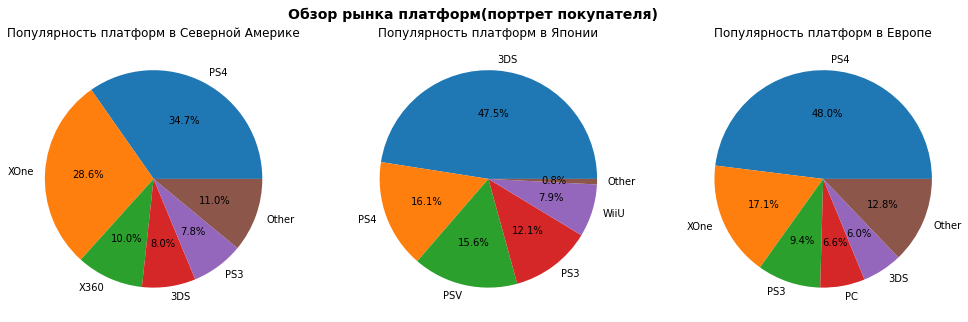

In [48]:
f, ax = plt.subplots(1,3)
f.set_size_inches(17,5)

plt.subplot(1,3,1)
distr = others_na['na_sales']
plt.pie(distr, labels=['PS4', 'XOne', 'X360', '3DS', 'PS3', 'Other'], autopct='%1.1f%%')
plt.title('Популярность платформ в Северной Америке');

plt.subplot(1,3,2)
distr = others_jp['jp_sales']
plt.pie(distr, labels=['3DS', 'PS4', 'PSV', 'PS3', 'WiiU', 'Other'], autopct='%1.1f%%')
plt.title('Популярность платформ в Японии');

plt.subplot(1,3,3)
distr = others_eu['eu_sales']
plt.pie(distr, labels=['PS4', 'XOne', 'PS3', 'PC', '3DS', 'Other'], autopct='%1.1f%%')
plt.title('Популярность платформ в Европе');

f.suptitle('Обзор рынка платформ(портрет покупателя)', fontsize=14, fontweight='bold');

**Вывод:** во всех странах в топ-5 популярных платформ вошли PS4, PS3 и 3DS. В Северной Америке и  Европе лидирует PS4 с долей продаж в 34.7% и 48% соответственно. В Японии - 3DS, занимающая почти половину всего рынка. 

#### check

In [49]:
actual_period.groupby('platform').agg({'na_sales':'sum', 'other_sales':'sum'
                                      }).sort_values(by='na_sales', ascending=False).iloc[:5]

,na_sales,other_sales
platform,,
PS4,98.61,44.48
XOne,81.27,12.52
X360,28.30,4.35
3DS,22.64,3.68
PS3,22.05,9.37


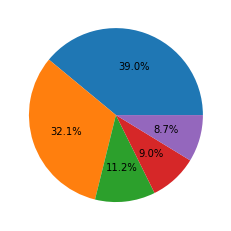

In [50]:
distr = na['na_sales']
plt.pie(distr, autopct='%1.1f%%');

#### Определим, топ-5 популярных жанров для жителей каждого региона

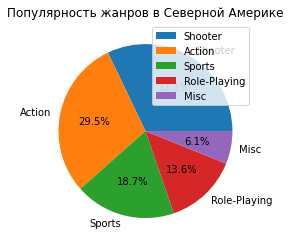

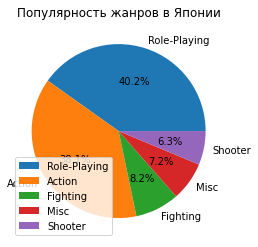

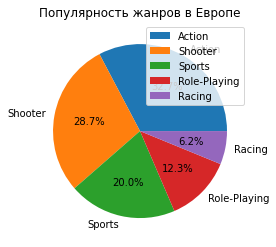

In [53]:
na_genre = (
    actual_period
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .iloc[:5])

na_genre.plot(y='na_sales', kind='pie', autopct='%1.1f%%')
plt.title('Популярность жанров в Северной Америке')
plt.ylabel('');

jp_genre = (
    actual_period
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .iloc[:5])

jp_genre.plot(y='jp_sales', kind='pie', autopct='%1.1f%%')
plt.title('Популярность жанров в Японии')
plt.ylabel('');

eu_genre = (
    actual_period
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .iloc[:5])

eu_genre.plot(y='eu_sales', kind='pie', autopct='%1.1f%%')
plt.title('Популярность жанров в Европе')
plt.ylabel('');

**Вывод:** приоритеты в жанрах в разных странах расходятся, на мой взгляд, из-за разных культур. Везде есть общие предпочтения - жанр, который занимает значимую долю во всех странах - action (думаю, потому что это стандартный жанр, полюбившийся всем). В Северной Америке и Европе также большую часть занимают шутеры, в то время как в Японии сильно ценятся ролевые игры.

#### Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [54]:
ESRB = actual_period.pivot_table(index='rating', values=['na_sales','jp_sales','eu_sales'], aggfunc='sum').sort_values(by=['na_sales','jp_sales','eu_sales'])
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E10+,26.16,4.46,33.23
T,34.07,14.78,38.95
E,58.06,8.94,50.74
RP,58.95,56.90,64.72
M,93.44,8.01,96.42


**Вывод:** можно утверждать, что рейтинг влияет на продажи игр в реионах. Так, у Северной Америки и Европы выбор падает на игры с рейтингом М (от 17 лет). В Японии большинство игр только ждут оценки (RP), а из более продаваемых можно выделить категорию Т (от 13 лет), которая является отсающей в других странах.

### Проверка гипотез

##### 1 гипотеза 
**Необходимо проверить**: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0: Средний рейтинг платформы Xbox One равен среднему рейтингу PC

H1: Средний рейтинг платформы Xbox One не равен среднему рейтингу PC

In [55]:
XOne = actual_period.loc[(actual_period['platform'] == 'XOne') & (actual_period['user_score'].notna()), 'user_score']
PC = actual_period.loc[(actual_period['platform'] == 'PC') & (actual_period['user_score'].notna()), 'user_score']

alpha = 0.05

results = st.ttest_ind(XOne, PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [56]:
print('Средний рейтинг платформы XOne', XOne.mean())
print('Средний рейтинг платформы PC', PC.mean())

Средний рейтинг платформы XOne 6.594545454545456
Средний рейтинг платформы PC 6.298360655737705


**Вывод:** не получилось отвергнуть нулевую гипотезу, а значит можем предполагать, что средние пользовательсике рейтинги этих плтаформ примерно равны.

##### 2 гипотеза 
**Необходимо проверить**: Средние пользовательские рейтинги жанров Action  и Sports разные.

H0: Средние пользовательские рейтинги жанров Action  и Sports равны

H1: Средние пользовательские рейтинги жанров Action  и Sports разные

In [58]:
Action = actual_period.loc[(actual_period['genre'] == 'Action') & (actual_period['user_score'].notna()), 'user_score']
Sports = actual_period.loc[(actual_period['genre'] == 'Sports') & (actual_period['user_score'].notna()), 'user_score']

alpha = 0.05

results = st.ttest_ind(Action, Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [59]:
print('Средний рейтинг жанра Action', Action.mean())
print('Средний рейтинг жанра Sports', Sports.mean())

Средний рейтинг жанра Action 6.760606060606061
Средний рейтинг жанра Sports 5.2251968503937


**Вывод:** отвергаем нулевую гипотезу, а значит средние пользовательские рейтинги по этим жанрам не равны. В большую или меньшую сторону - неизвестно, так как применялся двусторонний метод. 

Нулевую гипотезу я формулирую так, чтобы данные в ней были равны, альтернативная же идет от обратного. Метод для ttest был выбран ind, так как он подходит для сравнения двух независимых списков.

### Общие выводы

В процессе анализа данных были выполнены следующие этапы, а также сделаны выводы по ним:
1. Изучили общую информацию о данных
 - в датафрейме всего 11 столбцов и 16715 строк
 - во многих столбцах присутствуют пропуски, названия прописаны не в одном стиле, имеются ошибки в определении типа данных
2. Осуществили предобработку данных
 - явные дубликаты не были обнаружены, а неявные по ключевым столбцам были удалены
 - в стобцах с названием игры и жанром 1 пропуск, которые были удалены из-за малого количества, в столбце с годом выпуска 269 пропусков, в столбце с оценкой критиков больше половины пропущнных значений - все они были не тронуты, так как изменения могут сильно исказить картину, в реальной жизни лучше обговорить этот момент с заказчиком. Такая же ситуация и с данными оценок пользователей
 - в рейтинге игры пропуски были изменены на категорию "ожидает оценки", чтобы эти данные тоже участвовали в анализе, а несколько малочисленный категорий удалены
 - в столбце с оценкой пользователей встречается значение 'tbd'(To Be Determined), что, по сути, и есть NaN - поэтому привели значения этого столбца к числовому формату, заменяя все всплывающие ошибки на NaN, а тип данных изменила на нецелочисленный
 - столбец 'year_of_release' сделала целочисленным
3. Провели исследовательский анализ данных
 - наибольшее количество выпущенных игр пришлось на период с 2005 по 2011 годы
 - примерный "срок службы" платформы - около 10 лет
 - лидерами по продажам за все время являются PS3, X360, PS4, 3DS. На 2016 год перспективные платформы: PS4, XOne, PC и 3DS
 - игроки не сильно доверяют ни оценкам критиков, ни пользователей, ведь даже при высоком рейтинге игры часто имеют невысокие продажи (и наоборот)
 - у жанра shooter не только наибольшая медиана продаж, но и самые высокие выбросы (самая большая выручка). Также высокие медианные продажи у жанров Platform, Sports и Racing. Зато по выбросам после жанра shooter идет action - у него хоть и средние медианные проажи, зато преиодически выходят игр, набрающие высокую популярность. Видны неплохие показатели с достаточно длинными рядами успешно продающихся игр у жанров Fighting, Action, Role-Playing
4. Составили портрет пользователя каждого региона
 - во всех странах в топ-5 популярных платформ вошли PS4, PS3 и 3DS. В Северной Америке и Европе лидирует PS4 с долей продаж в 34.7% и 48% соответственно. В Японии - 3DS, занимающая почти половину всего рынка
 - приоритеты в жанрах в разных странах расходятся, на мой взгляд, из-за разных культур. Везде есть общие предпочтения - жанры, которые вошли в топ всех стран - action, sports, misc (думаю, потому что это стандартные жанры, полюбившиеся всем). В Северной Америке и Европе также значимую часть занимают шутеры, в то время как в Японии сильно ценятся ролевые игры
 - можно утверждать, что рейтинг влияет на продажи игр в реионах. Так, у Северной Америки и Европы выбор падает на игры с рейтингом М (от 17 лет). В Японии большинство игр только ждут оценки (RP), а из более продаваемых можно выделить категорию Т (от 13 лет), которая является отсающей в других странах
5. Проверили гипотезы
 - не получилось отвергнуть нулевую гипотезу, так как p-value=0.14 при a=0.05, а значит можем предполагать, что средние пользовательсике рейтинги этих плтаформ примерно равны
 - отвергаем нулевую гипотезу, так как p-value значительно меньше выбранного уровня статистической значимости, а значит средние пользовательские рейтинги по этим жанрам не равны. В большую или меньшую сторону - неизвестно, так как применялся двусторонний метод
 - нулеваягипотеза формулируется так, чтобы данные в ней были равны, альтернативная же идет от обратного. Метод для ttest был выбран ind, так как он подходит для сравнения двух независимых списков